# Random Forest Classification

- Random Forest is the collection of **randomly trained decision trees** and finds the best out of that by the average.
- Hence, random forest is the version of **ensemble learning**! Yes, ensemble learning is the process of training the same or different algorithm multiple times and selecting the best out of it.
- Algorithm type: **Regression**
- Number of the independent variable (X) = **N**
- Number of dependent variable (Y) = **1**
## Steps
1. Pick at random K data points from the Training set
2. Build the Decision Tree associated with these K data points
3. Choose the number Ntree for tree you want to build and repeat STEPS 1 & 2
4. For a new data point, make each one of your Ntree trees predicts the value of Y for the data point in question and assign the new data point the average across all of the predicted Y values. 

## Illustration
- Let assume that we have two different decision trees build on different data points.
- From the given picture, we can understand that one tree is tall and another has wide branches.

<img src="../static/random_forest_tree_illution_1.png" alt="random_forest_tree_illution_1.png" width="500">
<img src="../static/random_forest_tree_illution_2.png" alt="random_forest_tree_illution_2.png" width="500">

- Similarly, we can generate an N number decision tree from the input dataset.
- But, We all know the forest is the combination of multiple trees. 🌳🌲🌴🎋 -> 🏕️

<img src="../static/random_forest_illution.png" alt="random_forest_illution.png" width="1000">

## Data preprocessing

✔️ Import the necessary libraries.

✔️ Load dataset (Social_Network_Ads.csv).

❌ Our dataset doesn't have any missing data.

❌ Our dataset doesn't have any string data.

✔️ We have 400 data. So, we can split and have 75% for the training set and 25% for the testing set.

✔️ Applying feature scaling for the dataset will improve the performance of the model.

In [1]:
# Import libraries....
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# setting two digits after decimal point...
np.set_printoptions(precision=2)

In [2]:
# Load dataset...
dataset = pd.read_csv(r"../dataset/Social_Network_Ads.csv")
X = dataset.iloc[:, :-1].values # [row, column]
y = dataset.iloc[:, -1].values

In [3]:
# Split testing and training dataset...
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [4]:
# Performing feature scaling for the independent variable...
# Dependent variable y is already having 0's & 1's...
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
X_train = x_sc.fit_transform(X_train)
X_test = x_sc.transform(X_test)

## Train Random Forest Classification Model
- We are using scikit-learn's [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) module.


In [5]:
from sklearn.ensemble import RandomForestClassifier
random_forest_calssifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0) # n_estimators -> number of trees to train the forest
random_forest_calssifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predict New Value

In [6]:
print("Y Prediction : ", random_forest_calssifier.predict(x_sc.transform([[35,20000]])))

Y Prediction :  [0]


## Test Naive Bayes Model

In [7]:
y_pred = random_forest_calssifier.predict(X_test)
print("Comparison of y_pred & y_test", np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1), sep='\n')

Comparison of y_pred & y_test
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Create Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Confusion Matrix : ")
print(matrix)

# Detail view of matrix
print("Detail view of matrix : ")
NO_OF_CATEGORY = len(set(y_test))
for i in range(NO_OF_CATEGORY):
    for j in range(NO_OF_CATEGORY):
        print(f"Expect {j}", f"Predict {i}", ":", matrix[i][j])

Confusion Matrix : 
[[63  5]
 [ 4 28]]
Detail view of matrix : 
Expect 0 Predict 0 : 63
Expect 1 Predict 0 : 5
Expect 0 Predict 1 : 4
Expect 1 Predict 1 : 28


## Classification Accuracy Score

In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true=y_test, y_pred=y_pred))

0.91


## Classification Report

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=['Age', 'Estimated Salary']))

                  precision    recall  f1-score   support

             Age       0.94      0.93      0.93        68
Estimated Salary       0.85      0.88      0.86        32

        accuracy                           0.91       100
       macro avg       0.89      0.90      0.90       100
    weighted avg       0.91      0.91      0.91       100



## Visualising Train Set Result

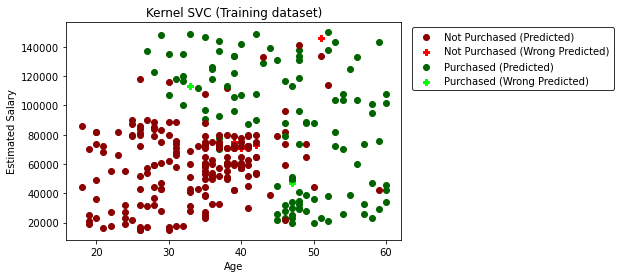

In [11]:
for i in zip(x_sc.inverse_transform(X_train), y_train):
    X = i[0]
    y = i[1]
    y_pred = random_forest_calssifier.predict(x_sc.transform([X]))
    if y == y_pred[0]:
        plt.scatter(
            x=X[0], y=X[1], marker='o',
            color=('#8B0000', '#006400')[y_pred[0]], 
            label=('Not Purchased (Predicted)', 'Purchased (Predicted)')[y_pred[0]]
        )
    else:
        plt.scatter(
            x=X[0], y=X[1], marker='P',
            color=('#FF0000', '#00FF00')[y_pred[0]], 
            label=('Not Purchased (Wrong Predicted)', 'Purchased (Wrong Predicted)')[y_pred[0]]
        )
plt.title("Kernel SVC (Training dataset)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")

handles, labels = plt.gca().get_legend_handles_labels()
label_dict = dict(zip(labels, handles))
by_label = {key:label_dict[key] for key in sorted(label_dict)}
plt.legend(by_label.values(), by_label.keys(), loc='upper right', edgecolor="black", bbox_to_anchor=(1.65, 1))
plt.show()

## Visualising Test Set Result

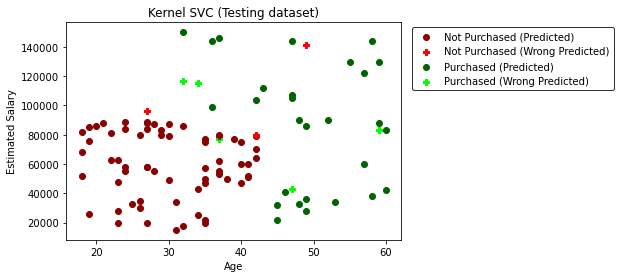

In [12]:
for i in zip(x_sc.inverse_transform(X_test), y_test):
    X = i[0]
    y = i[1]
    y_pred = random_forest_calssifier.predict(x_sc.transform([X]))
    if y == y_pred[0]:
        plt.scatter(
            x=X[0], y=X[1], marker='o',
            color=('#8B0000', '#006400')[y_pred[0]], 
            label=('Not Purchased (Predicted)', 'Purchased (Predicted)')[y_pred[0]]
        )
    else:
        plt.scatter(
            x=X[0], y=X[1], marker='P',
            color=('#FF0000', '#00FF00')[y_pred[0]], 
            label=('Not Purchased (Wrong Predicted)', 'Purchased (Wrong Predicted)')[y_pred[0]]
        )
plt.title("Kernel SVC (Testing dataset)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")

handles, labels = plt.gca().get_legend_handles_labels()
label_dict = dict(zip(labels, handles))
by_label = {key:label_dict[key] for key in sorted(label_dict)}
plt.legend(by_label.values(), by_label.keys(), loc='upper right', edgecolor="black", bbox_to_anchor=(1.65, 1))
plt.show()